<a href="https://colab.research.google.com/github/NamLam-L/Transfer-Learning-model/blob/main/DLL4_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
keras.__version__

'2.7.0'

In [ ]:
path = "//content//gdrive//MyDrive//ML"
import os
os.path.isdir(path)

True

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

In [ ]:
img_width, img_height = 150,150
nb_train_samples = 2002
nb_validation_samples = 1002
epochs = 50
batch_size = 16

In [ ]:

base_dir = path + '//Cat and Dog'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Validation')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Cat')


# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Dog')


# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'Cat')


# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'Dog')


# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'Cat')


# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'Dog')

In [ ]:
print(train_cats_dir)

//content//gdrive//MyDrive//ML//Cat and Dog/Train/Cat


In [ ]:
model_dir = "//content//gdrive//Shared drives//AI(everythings)//Transfer Learning Model"
os.path.isdir(model_dir)

True

In [ ]:
  train_cat_fnames = os.listdir(train_cats_dir)
  print(train_cat_fnames[:10])
  
  train_dog_fnames = os.listdir(train_dogs_dir)
  train_dog_fnames.sort()
  print(train_dog_fnames[:10])

['cat.100.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.0.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg']


In [ ]:
print("total train cat images: ", len(os.listdir(train_cats_dir)))
print("total train dog images: ", len(os.listdir(train_dogs_dir)))
print("total validation cat images: ", len(os.listdir(validation_cats_dir)))
print("total validation dog images: ", len(os.listdir(validation_dogs_dir)))
print("total test cat images: ", len(os.listdir(test_cats_dir)))
print("total test dog images: ", len(os.listdir(test_dogs_dir)))

total train cat images:  1001
total train dog images:  1001
total validation cat images:  501
total validation dog images:  501
total test cat images:  501
total test dog images:  501


In [ ]:
training_data_dir = train_dir
validation_dir = validation_dir
test_data_dir = validation_dir



# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
model = VGG16(include_top = False, weights = 'imagenet') #

Lưu ý: ở đây ta dùng transfer learning nghĩa là lấy cái model VGG16 mà người ta đã train để train lại trên tệp dữ liệu của mình nhằm rút ngắn thời gian. Tuy nhiên, cần lưu ý là để reuse lại bất cứ model nào, ta phải chắc chắn model đó đã train các object tương tự object mà ta đang muốn train lại. Ví dụ: ở dòng code trên ta dùng lại model VGG16 với weights `('imagenet')` để train lại 2000 bức ảnh chó và mèo. Hiển nhiên trong super dataset `('imagenet')` đã có chứa những bức ảnh chó và mèo và nó đã đc train quá vì vậy việc sử dụng model để train tiếp 2000 bức ảnh chó mèo của ta là hợp lý. Bởi nếu super dataset `('imagenet')` không chứa bất kỳ ảnh chó mèo nào mà ta lại sử dụng lại nó cũng đồng nghĩa ta đang xây dựng 1 model mới, thứ tốn rất nhiều tài nguyên và thời gian để training.

* Include_top = False => Ta không lấy phần NN của VGG16 mà chỉ lấy phần feature extractions của nó thôi. Do ở VGG16 gốc, output của mạng NN là 100k output, trong khi ở trong ngữ cảnh này, ta chỉ cần 2 Output để kiểm tra chó hoặc mèo.

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
generator = datagen.flow_from_directory(
    training_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = None,
    shuffle = False ## Shuffle ở đây có nghĩa là không xáo trộn trình tự của các bức ảnh trong tệp ảnh được truy vấn bởi đường dẫn "train_data_dir".
)
bottleneck_features_train = model.predict_generator(
    generator, nb_train_samples // batch_size)
np.save(open(model_dir + '/bottleneck_features_train.npy', 'wb'),bottleneck_features_train)



generator = datagen.flow_from_directory(
    validation_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = None,
    shuffle = False ## Shuffle ở đây có nghĩa là không xáo trộn trình tự của các bức ảnh trong tệp ảnh được truy vấn bởi đường dẫn "train_data_dir".
)
bottleneck_features_validation = model.predict_generator(    
    generator, nb_validation_samples // batch_size)
np.save(open(model_dir + '/bottleneck_features_validation.npy', 'wb'),bottleneck_features_validation)

Found 2002 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

In [ ]:
# datagen = ImageDataGenerator(rescale = 1./255)
# generator = datagen.flow_from_directory(
#     validation_dir,
#     target_size = (img_width, img_height),
#     batch_size = batch_size,
#     class_mode = None,
#     shuffle = False ## Shuffle ở đây có nghĩa là không xáo trộn trình tự của các bức ảnh trong tệp ảnh được truy vấn bởi đường dẫn "train_data_dir".
# )
# bottleneck_features_validation = model.predict(
#     generator, nb_validation_samples // batch_size)
# np.save(open(model_dir + '/bottleneck_features_validation', 'wb'),bottleneck_features_validation)

Found 1002 images belonging to 2 classes.


In [ ]:
train_data = np.load(open(model_dir + '/bottleneck_features_train.npy', 'rb'))
train_labels = np.array( 
    [0] * 1000 + [1]*1000
)
validation_data = np.load(open(model_dir + '/bottleneck_features_validation.npy', 'rb'), allow_pickle=True)
validation_labels = np.array(
    [0] * 496 + [1]* 496 
)


In [ ]:
print(len(validation_data))

992


In [ ]:
from keras import models

model = models.Sequential()
model.add(Flatten(input_shape = train_data.shape[1:]))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.5)) ## mỗi lần train, ta sẽ "đóng băng" 50% số neurons bất kỳ nào đó để model của ta tập làm quen với việc thiếu sót dữ liệu 
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics= ['accuracy'])
#model.summary()
model.fit(train_data, train_labels, epochs= epochs, batch_size= batch_size, validation_data= (validation_data, validation_labels))

Epoch 1/50
125/125 [==============================] - 4s 24ms/step - loss: 0.6675 - accuracy: 0.7615 - val_loss: 0.4614 - val_accuracy: 0.7752
Epoch 2/50
125/125 [==============================] - 3s 23ms/step - loss: 0.3723 - accuracy: 0.8550 - val_loss: 0.2782 - val_accuracy: 0.8881
Epoch 3/50
125/125 [==============================] - 3s 24ms/step - loss: 0.2912 - accuracy: 0.8875 - val_loss: 0.4350 - val_accuracy: 0.8367
Epoch 4/50
 50/125 [===========>..................] - ETA: 1s - loss: 0.2534 - accuracy: 0.8950

KeyboardInterrupt: ignored

In [ ]:
model.save_weights(model_dir + "//model_Cat and Dog Classifier VGG16.h5")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MODEL_FILE = model_dir + "//model_Cat and Dog Classifier VGG16.h5"
model.load_weights(MODEL_FILE)

In [ ]:
test_data_generator = ImageDataGenerator(rescale= 1./255)
test_generator = test_data_generator.flow_from_directory(
    validation_dir,
    target_size = (img_width, img_height),
    batch_size = 1,
    class_mode = "binary",
    shuffle = False )

Found 1002 images belonging to 2 classes.


In [ ]:
test_dir

'//content//gdrive//MyDrive//ML//Cat and Dog/Validation'

In [ ]:
#build the VGG16 network
Pre_model = VGG16(include_top = False, weights = 'imagenet')

In [ ]:
print(len(test_generator))

1002


In [ ]:
batch_size  = 50
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
bottleneck_features = Pre_model.predict_generator(test_generator, batch_size)
print(len(bottleneck_features[0][0][0]))
probabilities = model.predict(bottleneck_features, batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


512


index: 0


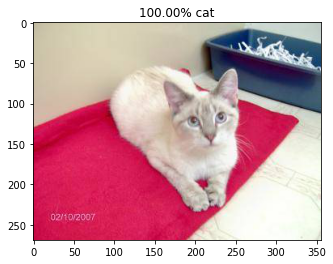

index: 1


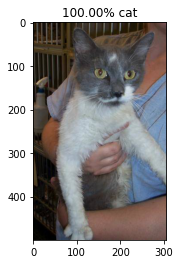

index: 2


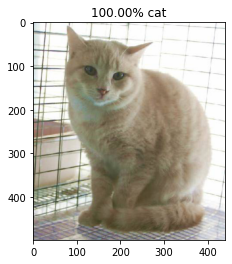

index: 3


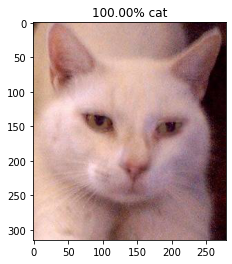

index: 4


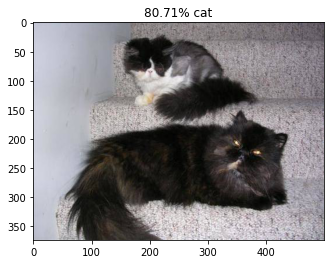

index: 5


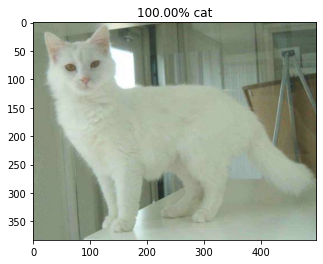

index: 6


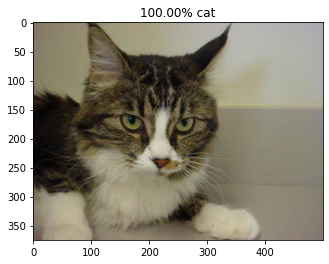

index: 7


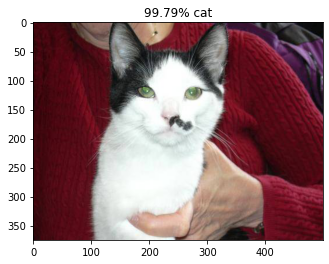

index: 8


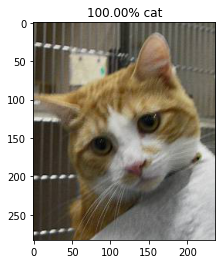

index: 9


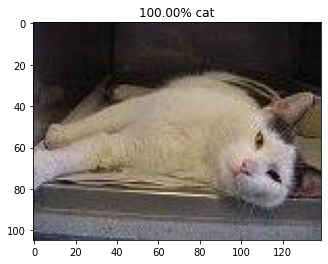

index: 10


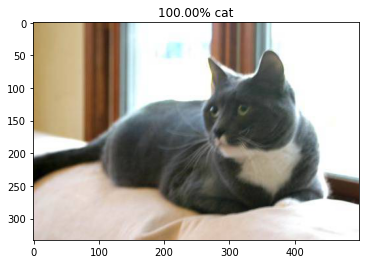

index: 11


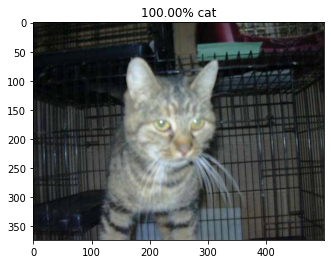

index: 12


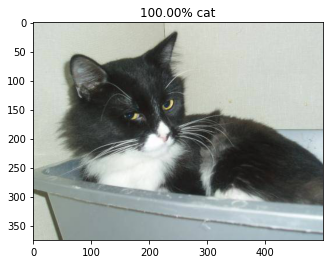

index: 13


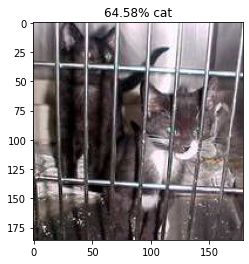

index: 14


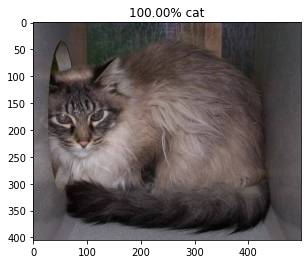

index: 15


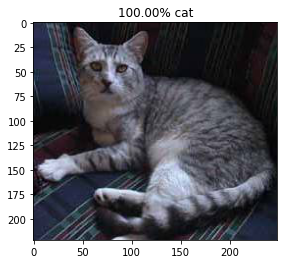

index: 16


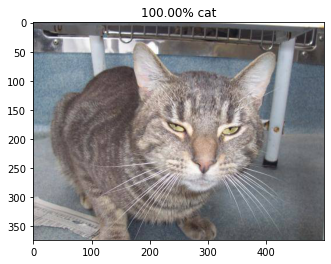

index: 17


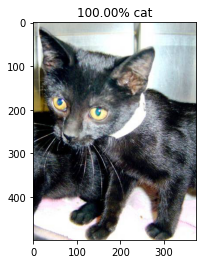

index: 18


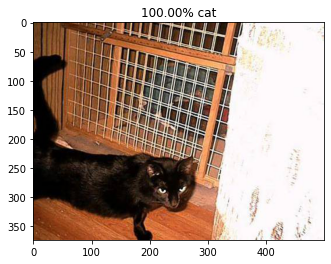

index: 19


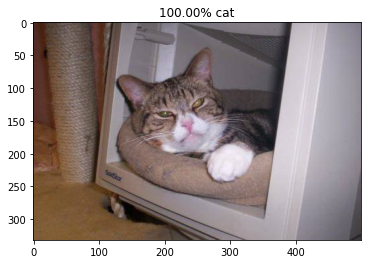

index: 20


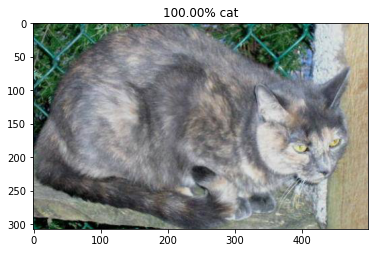

index: 21


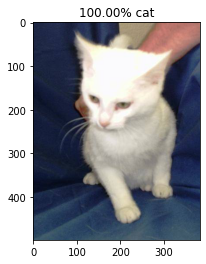

index: 22


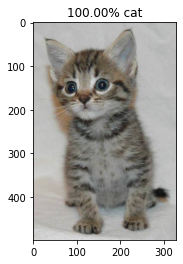

index: 23


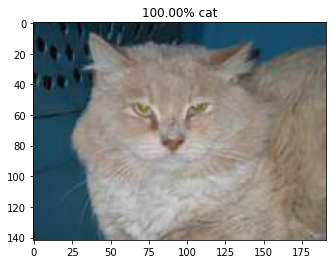

index: 24


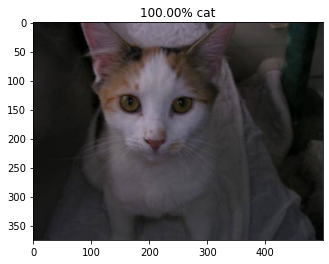

index: 25


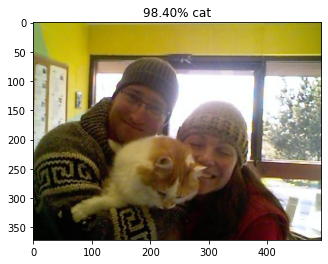

index: 26


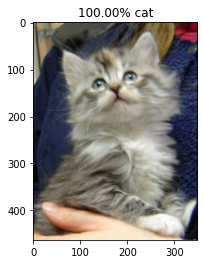

index: 27


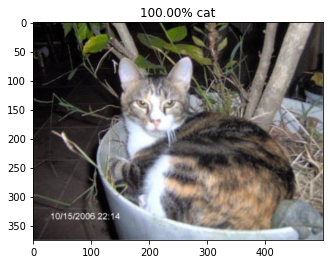

index: 28


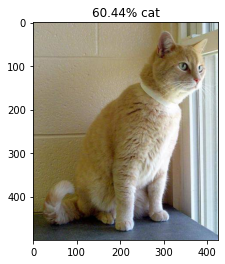

index: 29


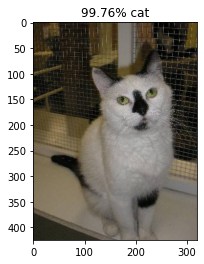

index: 30


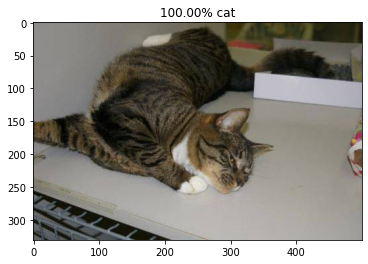

index: 31


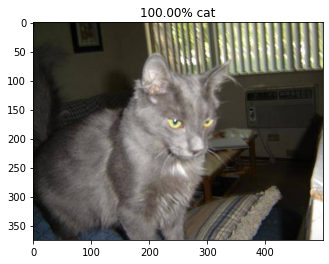

index: 32


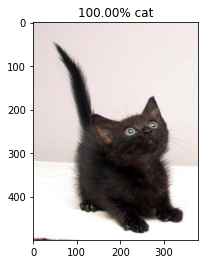

index: 33


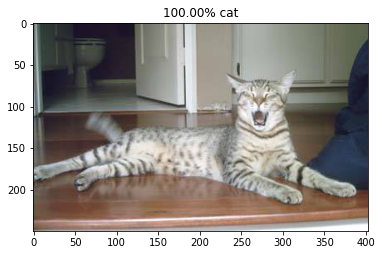

index: 34


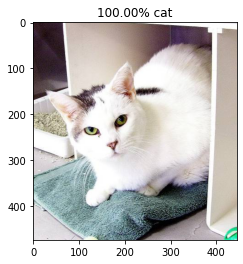

index: 35


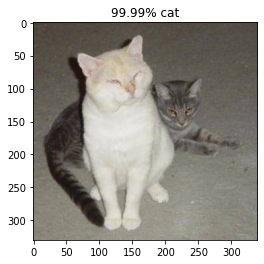

index: 36


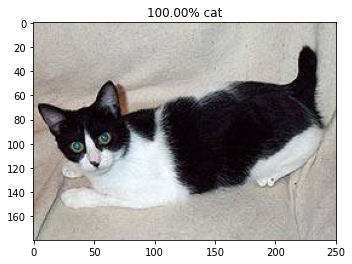

index: 37


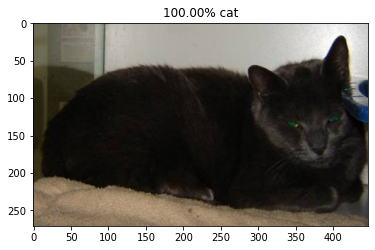

index: 38


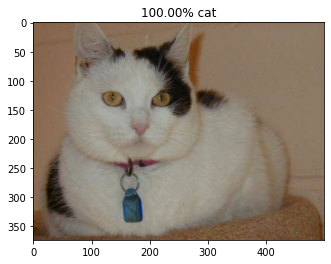

index: 39


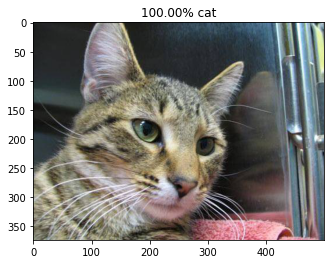

index: 40


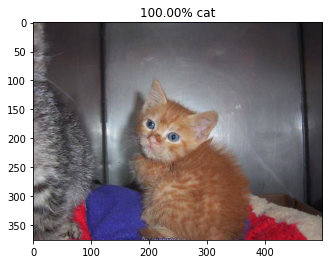

index: 41


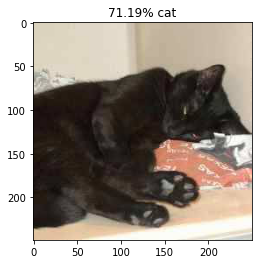

index: 42


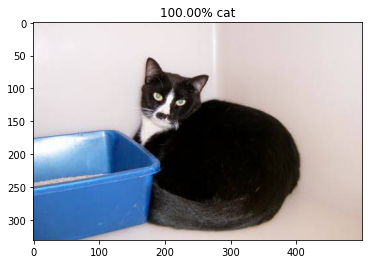

index: 43


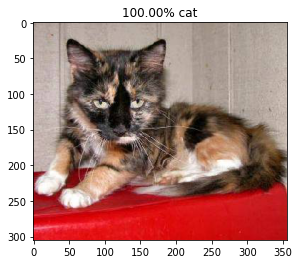

index: 44


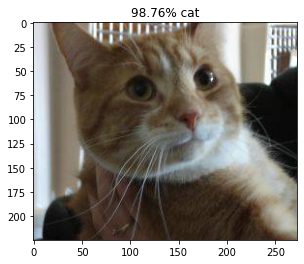

index: 45


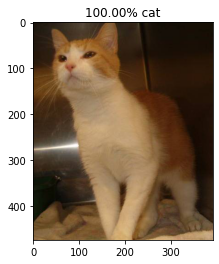

index: 46


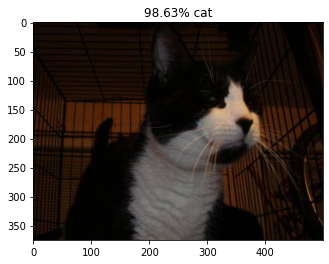

index: 47


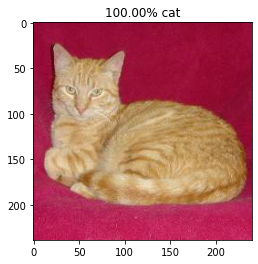

index: 48


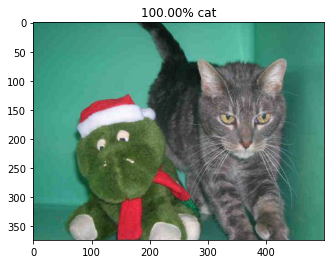

index: 49


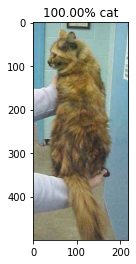

In [ ]:

for index, probability in enumerate(probabilities):
  print("index:", index)
  # print(" probability", probability[0])
  # print("file_name:", test_generator.filenames[index])
  image_path = test_dir + "/" + test_generator.filenames[index]
  img = mpimg.imread(image_path)
  plt.imshow(img)
  if probability > 0.5:
    plt.title("%.2f" % (probability[0]*100) + "% dog")
  else:
    plt.title("%.2f" % ((1-probability[0])*100)+ "% cat" )
  plt.show()


In [ ]:
nb_train_samples // batch_size

40